In [1]:
import requests
from IPython.display import Image
from StringIO import StringIO
import os
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#r = requests.get('http://server.com/1.jpg')
#r.content
#i = Image.open(StringIO(r.content))

In [2]:
MAPBOX_API_KEY = os.environ.get('MAPBOX_API_KEY')

In [3]:
r = requests.get('http://maps.google.com/cbk?output=xml&ll=40.7625000,-73.9741670&dm=1')

In [4]:
#X goes from 0 (left edge is 180 °W) to 2zoom − 1 (right edge is 180 °E)
#Y goes from 0 (top edge is 85.0511 °N) to 2zoom − 1 (bottom edge is 85.0511 °S) in a Mercator projection
import math
def deg2num(lat_deg, lon_deg, zoom):
    lat_rad = math.radians(lat_deg)
    n = 2.0 ** zoom
    xtile = int((lon_deg + 180.0) / 360.0 * n)
    ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
    return (xtile, ytile)

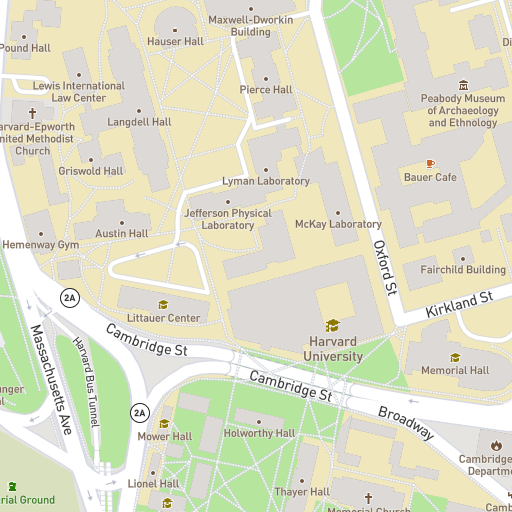

In [5]:
payload = {'access_token': MAPBOX_API_KEY}

zoom = 16
x, y = deg2num(42.377771, -71.116268, zoom)

r = requests.get("https://api.mapbox.com/styles/v1/mapbox/streets-v9/tiles/%s/%s/%s" % (zoom, x,y), payload)
Image(r.content)

In [8]:
"https://api.mapbox.com/styles/v1/mapbox/streets-v10/static/-122.4241,37.78,14.25,0,60/600x600?access_token=your-access-token"

'https://api.mapbox.com/styles/v1/mapbox/streets-v10/static/X-Rate-Limit-Interval'

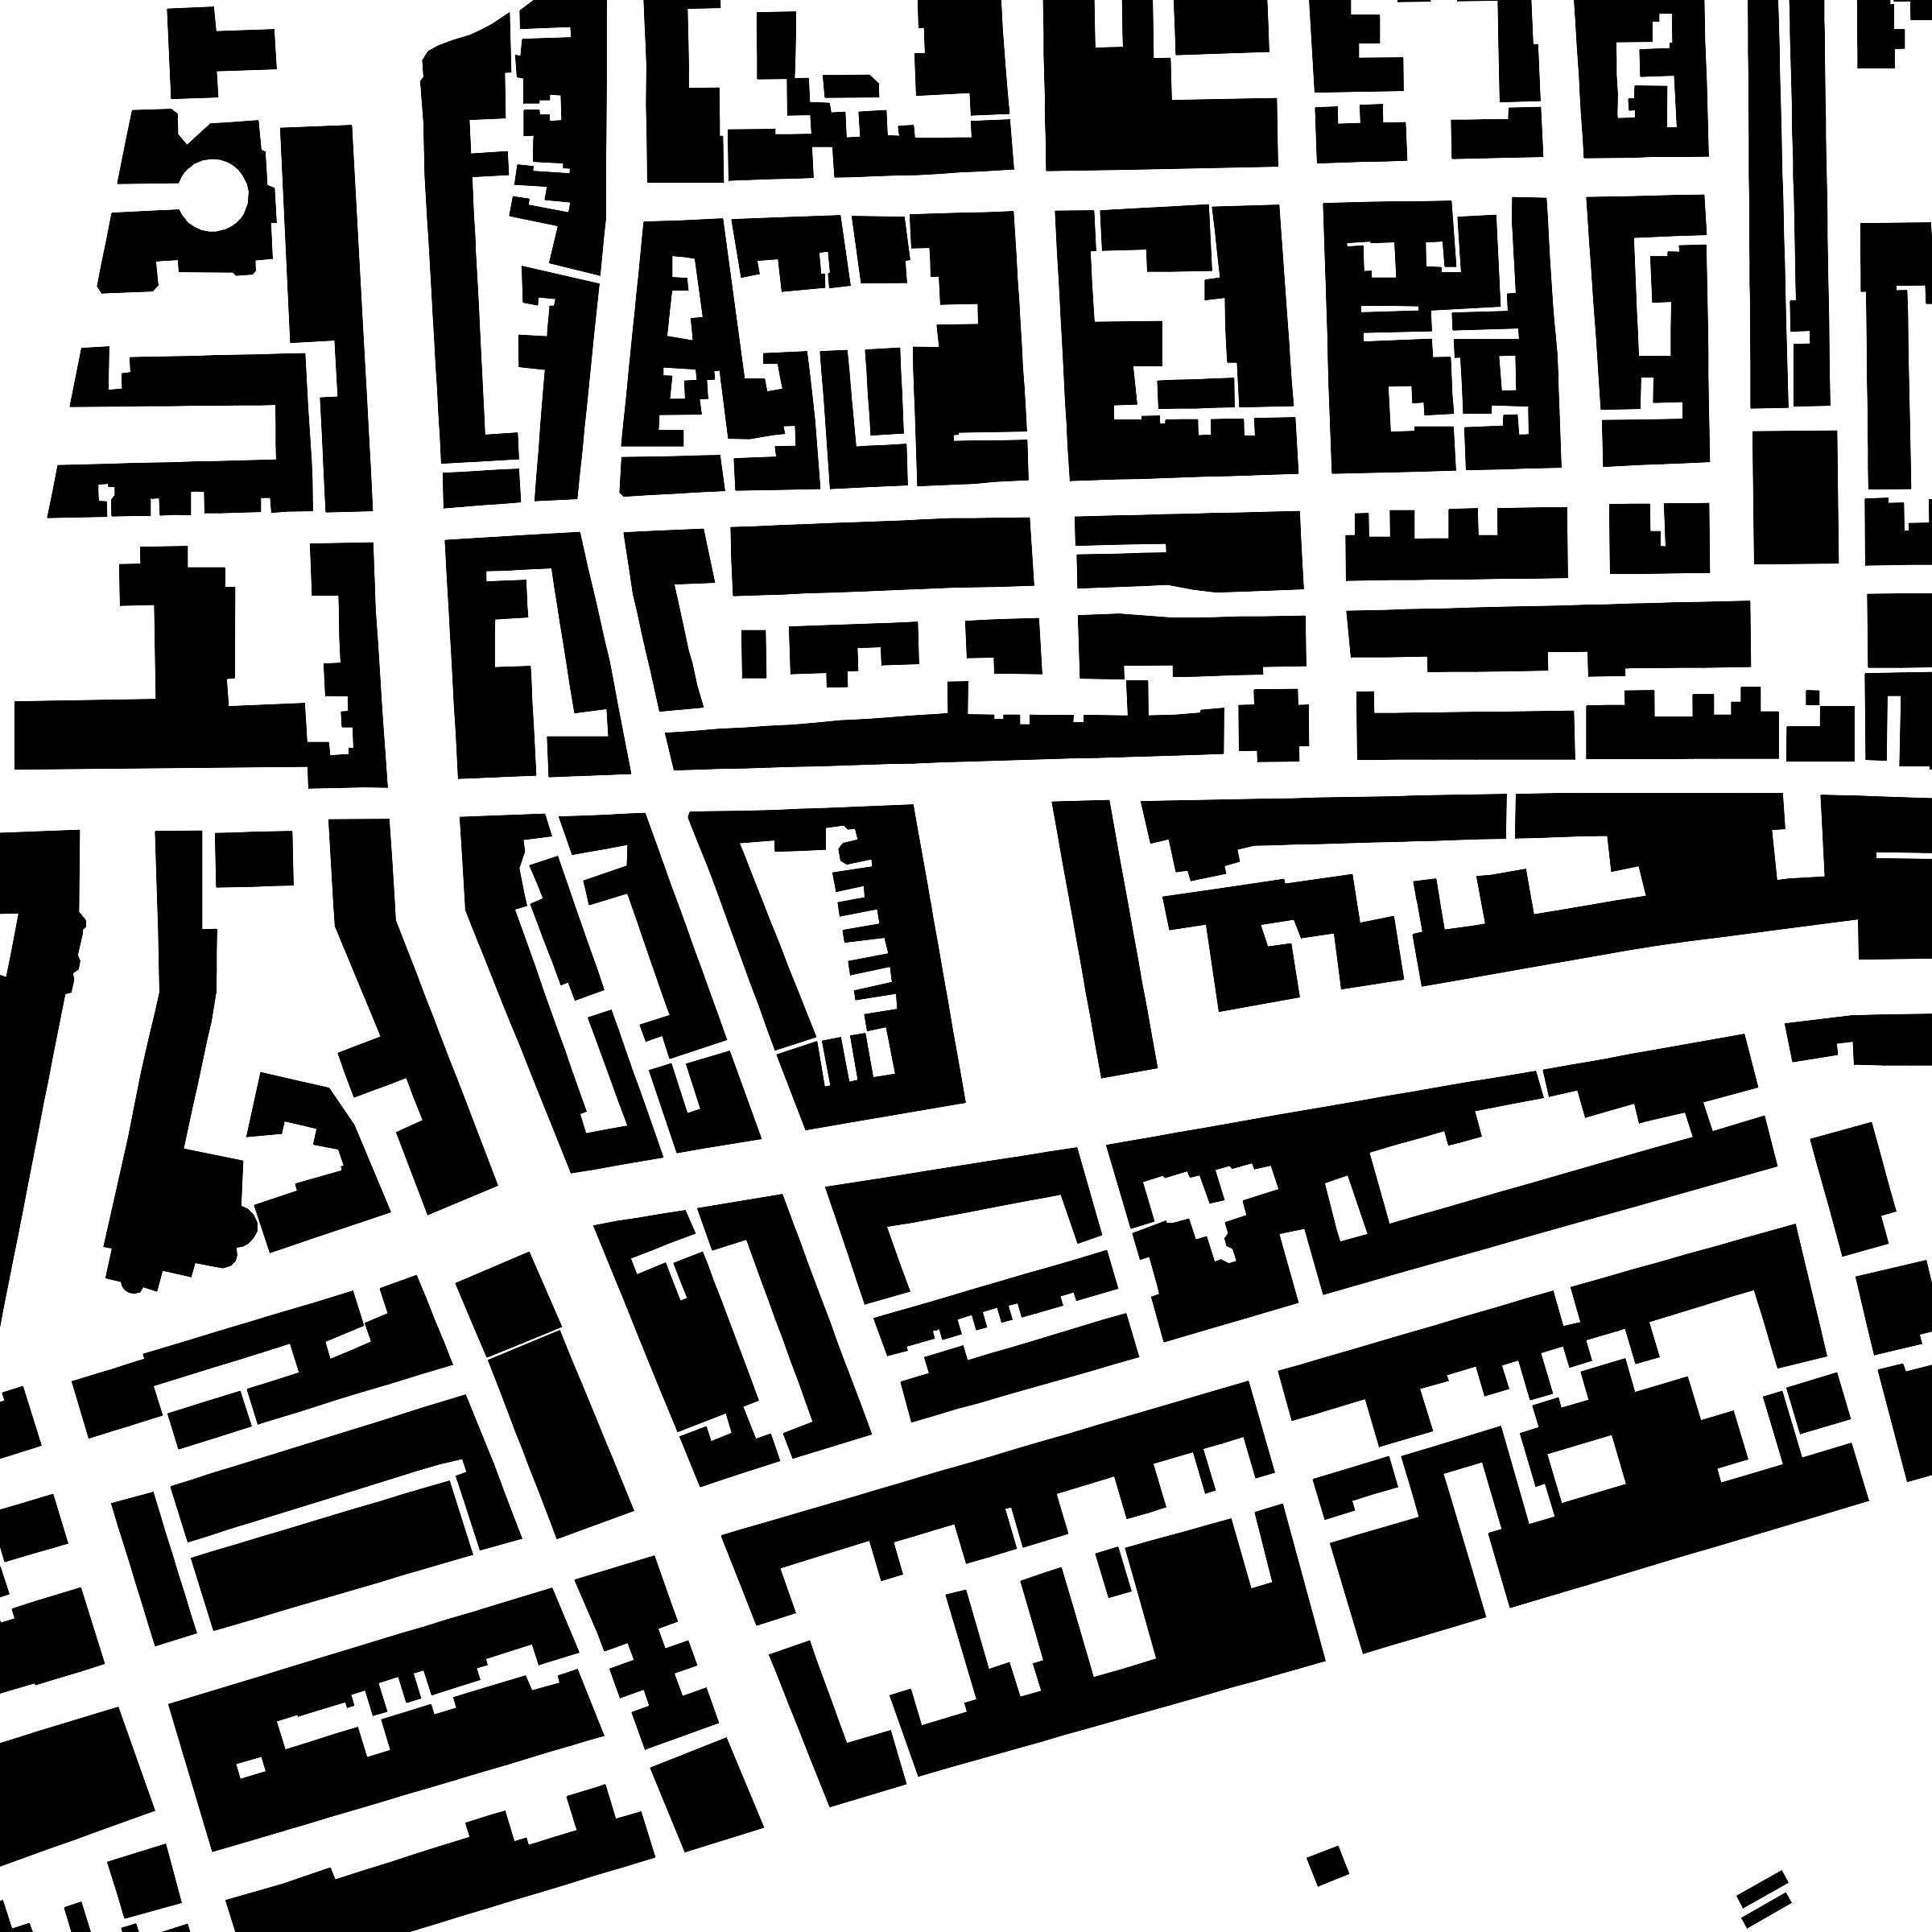

In [10]:
payload = {'access_token': MAPBOX_API_KEY,
           'attribution': 'false',
           'logo': 'false'}

zoom = 16
x, y = deg2num(42.377771, -71.116268, zoom)
	
r = requests.get("https://api.mapbox.com/styles/v1/brianho/cj1drel9q00092spdf2ntlhjb/static/-71.06890538,42.35838167,17,0,0/1200x1200@2x", payload)
Image(r.content)

In [94]:
images = os.listdir('kl_images')

In [146]:
data[data.id == int(images[10][:-4])].Title.to_string()

u'1449    Parking Lot, Boston University, Commonwealth A...'

In [143]:
def f(x):
    index = x%len(images)
    name = images[index][:-4]
    
    print data[data.id == int(images[index][:-4])].Title.to_string()
    return Image('kl_images_small/'+images[index])

In [114]:
data = pd.read_csv('kl_master copy.csv')
data.head()

,id,Title,Access Statement,Check,Contributors,Copyright,DSpace_Handle,Date,Identifier,Location,Materials,Period,Techniques,Type
0,3401918064,"Grid Series, Taken from Intersecting Points of...",Creative Commons Attribution-NonCommercial 3.0,1,"researcher: Gyorgy Kepes (American, 1906-2001)...",(c) Massachusetts Institute of Technology,NaN,creation date: between 1954-1959,KL_001024,"Creation location: Boston (Massachusetts, Unit...",gelatin silver prints,Modern,documentary photography,Photograph
1,3401883956,"Grid Series, Taken from Intersecting Points of...",Creative Commons Attribution-NonCommercial 3.0,1,"researcher: Gyorgy Kepes (American, 1906-2001)...",(c) Massachusetts Institute of Technology,NaN,creation date: between 1954-1959,KL_001015,"Creation location: Boston (Massachusetts, Unit...",gelatin silver prints,Modern,documentary photography,Photograph
2,3421482684,"Courtyard of Ola's Restaurant, with Diners, Ca...",Creative Commons Attribution-NonCommercial 3.0,1,"researcher: Gyorgy Kepes (American, 1906-2001)...",(c) Massachusetts Institute of Technology,NaN,"creation date: 11:00-11:30, July 7, 1956",KL_001373,"Creation location: Boston (Massachusetts, Unit...",gelatin silver prints,Modern,documentary photography,Photograph
3,3420775121,Scollay Square from Bowdoin Square,Creative Commons Attribution-NonCommercial 3.0,1,"researcher: Gyorgy Kepes (American, 1906-2001)...",(c) Massachusetts Institute of Technology,NaN,"creation date: 2:00 P.M., April 28, 1957",KL_001422,"Creation location: Boston (Massachusetts, Unit...",gelatin silver prints,Modern,documentary photography,Photograph
4,3442248200,"Traffic Intersection One - View from Above, Tr...",Creative Commons Attribution-NonCommercial 3.0,1,"researcher: Gyorgy Kepes (American, 1906-2001)...",(c) Massachusetts Institute of Technology,NaN,creation date: between 1954-1959,KL_001932,"Creation location: Boston (Massachusetts, Unit...",gelatin silver prints,Modern,documentary photography,Photograph


In [144]:
interact(f, x=len(images));

A Jupyter Widget